# Evolutionary Computing - N-Queens Problem


**Goal**: Implement an Evolutionary Algorithm to solve for the N-Queens problem. Could be defined as minimization of maximization.

This assignment requires implementation of the main components of an evolutionary algorithm (i.e. *crossover*, *mutation*, *parent selection*, etc), and construction of your algorithm to solve the given problem. Try to make your EA as good performing as possible (solving also the bigger chess boards).

Please answer the `Questions` and implement coding `Tasks` by filling **PLEASE FILL IN** sections. *Documentation* of your code is also important. You can find the grading scheme in implementation cells.

  * Plagiarism is automatically checked and set to **0 points**

  * It is allowed to learn from external resources but copying is not allowed. If you use any external resource, please cite them in the comments (e.g. `# source: https://...../` (see `fitness_function`))

POINTS ARE ONLY FOR RELATIVE FEEDBACK, NOT AN ACTUAL GRADE.

**Setup**

**Install Prerequisites**

In [1]:
# Run this cell to install the required libraries
%pip install numpy matplotlib scipy

Note: you may need to restart the kernel to use updated packages.


**Imports**

In [2]:
# Necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ranksums

# Set seed
np.random.seed(42)

**Plotting**

In [3]:
# Enables inline matplotib graphs
# %matplotlib inline
%pip install PyQt5
# Comment the line above and uncomment the lines below to have interactive plots
# WARN: may cause dependency issues
#%matplotlib qt5
#%pip install PyQt5
#plt.ion()

Note: you may need to restart the kernel to use updated packages.


In [4]:
def generate_subplot_function(
    avgs_experiment_1,
    stds_experiment_1,
    labels,
    avgs_experiment_2,
    stds_experiment_2,
    n_columns,
    n_queens,
):
    """This helper function generates subplots for the experiments."""
    fig, axes = plt.subplots(nrows=1, ncols=n_columns, figsize=(18, 6))

    for i in range(len(avgs_experiment_1)):
        if avgs_experiment_2 is not None:
            # Plot data for subplot 1
            axes[i].plot(avgs_experiment_2[i], label="Experiment 2", color="green")
            axes[i].fill_between(
                np.arange(len(avgs_experiment_2[i])),
                avgs_experiment_2[i] - stds_experiment_2[i],
                avgs_experiment_2[i] + stds_experiment_2[i],
                alpha=0.2,
                color="green",
            )
            axes[i].set_ylim(bottom=0)

            if n_queens:
                axes[i].set_ylim(top=n_queens[i])

        axes[i].plot(avgs_experiment_1[i], label="Experiment 1", color="blue")
        axes[i].fill_between(
            np.arange(len(avgs_experiment_1[i])),
            avgs_experiment_1[i] - stds_experiment_1[i],
            avgs_experiment_1[i] + stds_experiment_1[i],
            alpha=0.2,
            color="blue",
        )
        axes[i].set_title(labels[i])
        axes[i].set_ylim(bottom=0)
        if n_queens:
            axes[i].set_ylim(top=n_queens[i])

    # Set common labels and title
    for ax in axes:
        ax.set_xlabel("Generations")
        ax.set_ylabel("Average Best Fitness")
        ax.legend()

    plt.tight_layout()

---

## Discrete Optimization - The N-Queens Problem (5 points total)

Implement an Evolutionary Algorithm for the **n-queens problem** - finding a placement of N queens on an N by N chess board, in which no queens are attacking each other.

Below is a visualization of a solution for the n-queens problem when n = 4. Observe that none of the queens are attacking each other.

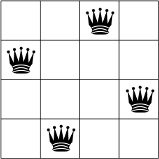


We would like to implement an EA that can find a solution for any given N by N board, by placing N queens where none of them attack each other.
It is usually better to start simple and generalize your implementation. So, let's start with the case when **N = 4**.

### **Question 1 (0-0.3 pt):**
* How do you represent a solution (a 4 queen placement on a 4x4 chess board)? In particular, specify the length of your genotype representation, what each gene (dimension) represents, and what values they can get.

**Answer:** The solution can be represented as: solution = [0, 1, 2, 3]. The length of the genotype representation is thus 4. Every input in the genotype representation represents a queen and their position on the board. The index represents the row and the number at the index represents the column. The solution cannot be longer than 4 numbers since there are no more than 4 queens on the board. This solution also assumes that there are always N queens (so 4 here) on a N by N board. This solution also assumes that no queen shall occupy the same row at any point. Which is a limitation to the solution space such that less invalid answers may be obtained. Additionally, this implementation makes it simple to also implement that no queen may occupy the same column. 


### **Question 2 (0-0.2 pt):**
* Please write down an example representation and discuss what it means.

**Answer:** We can say that for a 4x4 chess board, represented as: solution = [0, 1, 2, 3], 4 queens are found at locations:

- row 0, column 0. 
- row 1, column 1.
- row 2, column 2.
- row 3, column 3.

Note that the given solution is not a correct one but is given as a representation of a solution. This means the queens are placed in a diagonal line of the chessboard going from top-left to bottom-right.


### **Question 3 (0-0.2 pt):** 
* How many possible solutions can be generated in your representation?

**Answer:** Each queen is capable of occupying 4 different spaces: 0, 1, 2, 3. Therefore there are, including incorrect ones, 4x4x4x4=256 different solutions. However if we also make sure that no queen may occupy the same column, this becomes: 4x3x2x1=24 solutions, severely limiting the number of invalid solutions. 

---

### **Task 1 (0-0.20-0.40-0.80):** 
Implementation of solution encoding, visualization and evaluation functions.

In [5]:
################################################################


# PLEASE FILL IN - how do you represent your solution?
example_solution = [1, 3, 0, 2]


################################################################

Write a function below that can visualize your solution. For instance, the output may look like below, a matrix representing the 4x4 chess board where each Q indicates a queen placement and dots are empty cells. <br>
<br>
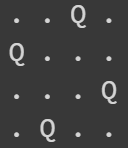


In [6]:
def visualize_solution(solution):
    """Visualize the placement of queens on the chessboard."""

    ################################################################

    # Determine length of board
    N = len(solution)

    # Initialize chessboard
    chessboard = np.full((N, N), '.', dtype=str)

    # Iterate over everything, dots for empy and Q for queens.
    row = 0
    for column in solution:
        chessboard[row, column] = 'Q'
        # Update the index for the row
        row += 1
    
    # Print like in the example
    for row in chessboard:
        print(" ".join(row))

    ################################################################

# Uncomment to check matrix
visualize_solution(example_solution)

. Q . .
. . . Q
Q . . .
. . Q .


Write the evaluation function to assess how good your solution is.

In [7]:
def evaluate_solution_n_queens(solution):
    """ Calculate the fitness of an solution.
        Option 1 (OFF): First queen is always correct so there is a base fitness of 1. 
            Stores information to check against.
        Option 2: Checks all placements, fitness will be zero if all queens 
            have a 'conflict' with another.
    """
    ################################################################

    # Option 1
    # fitness = len(solution)

    # checked = []
    # checked_diag_up = []
    # checked_diag_down = []
    # col = 0

    # # Checks rows
    # for row in solution:
    #     if row in checked:
    #         fitness -= 1

    #     # Checks diagonals
    #     elif row - col in checked_diag_up:
    #         fitness -= 1
    #     elif row + col in checked_diag_down:
    #         fitness -= 1

    #     checked_diag_up.append(row - col)
    #     checked_diag_down.append(row + col)
    #     checked.append(row)

    #     col +=1

    # Option 2
    N = len(solution)

    # Stores True or False queen placements
    placement = []

    # Iterate over the columns
    for col in range(N):

        # Store row information
        row = solution[col]

        # Assume placement is correct until proven not
        correct = True

        for col_next in range(N):
            # Do not compare with own placement
            if col_next == col:
                continue
            
            # Choose next row to compare
            row_next = solution[col_next]

            # Check correct placement both horizontal and diagonal
            if row == row_next or abs(col - col_next) == abs(row - row_next):
                correct = False
                break

        placement.append(correct)
    # Sum up placements (False=0, True=1)
    fitness = sum(placement)

    ################################################################

    return fitness


Try your implementations to see if your solution encoding matches to visualization and whether the fitness is computed correctly.

In [8]:
#################################
# Grading
# 0 pts: No attempt, representation discussed does not match with the implementation and visualization, fitness is not correct.
# 0.20 : Solution representation matches with visualization, fitness computation is not correct, no explanation in the code.
# 0.50 : Solution representation matches with visualization, fitness computation is correct, no explanation in the code.
# 0.80 : Solution representation matches with visualization, fitness computation is correct, the implementation explained well.
################################################################


###################### DO NOT CHANGE #########################
print("Genotype (solution representation):", example_solution)
print("Phenotype (solution visualization):")
visualize_solution(example_solution)
print("Solution fitness", evaluate_solution_n_queens(example_solution))
###################### DO NOT CHANGE #########################

Genotype (solution representation): [1, 3, 0, 2]
Phenotype (solution visualization):
. Q . .
. . . Q
Q . . .
. . Q .
Solution fitness 4


---



### **Task 2 (0-0.4-0.8-1.2-1.6 pt):** 
Write an evolutionary algorithm that can initialize a population of solutions and finds N queen placement to NxN board optimizing the number of attacks (could be minimization or maximization based on your evaluation function of the solutions).

In [9]:
#################################
# Grading
# 0 pts if the code does not work, code works but it is fundamentally incorrect
# 0.4 pts if the code works but some functions are incorrect and it is badly explained
# 0.8 pts if the code works but some functions are incorrect but it is explained well
# 1.2 pts if the code works very well aligned with the task without any mistakes, but it is badly explained
# 1.6 pts if the code works very well aligned with the task without any mistakes, and it is well explained
################################################################


def initialization_n_queens(population_size, num_of_dims):
    """Generate a population of solutions. A solution is generated 
    randomly. Solutions are stored in x (all populations) as lists. """
    ################################################################

    x = []

    # Iterate over population size
    for _ in range(population_size):
        # Generate a random solution (by permutation)
        solution = np.random.permutation(num_of_dims).tolist()

        # Add the solution to the population
        x.append(solution)

    print(x)
    ################################################################

    return x


def evaluation_n_queens(x):
    """Evaluate the whole population and return the fitness of each."""
    return [evaluate_solution_n_queens(solution) for solution in x]


def crossover_n_queens(x_parents, p_crossover):
    """Perform crossover to create offsprings."""

    ################################################################
    o1 = []
    o2 = []
    
    # Take two random parents from the list (should always be 2)
    idx_parents = np.random.choice(len(x_parents), size=2, replace=False)
    x1, x2 = x_parents[idx_parents[0]], x_parents[idx_parents[1]]

    # sample random value
    cross = np.random.rand()

    # return empty offspring list if no crossover
    if cross > p_crossover:
        return x_parents
    
    # Select location (index) for crossover
    crossover_idx = np.random.randint(1, len(x1))

    # Insert genotype up to crossover spot
    o1 = x1[:crossover_idx]
    o2 = x2[:crossover_idx]
        
    # Make correct crossover order
    x1 = x1[crossover_idx:] + x1[:crossover_idx]
    x2 = x2[crossover_idx:] + x2[:crossover_idx]

    # Place crossover in correct order
    for genotype in x2:
        if genotype not in o1:
            o1.append(genotype)

    for genotype in x1:
        if genotype not in o2:
            o2.append(genotype)

    # put crossovers in offspring list
    offspring = [o1, o2]

    ################################################################

    return offspring


def mutation_n_queens(x, mutation_rate):
    """Apply mutation to an individual."""

    ################################################################

    # Perform mutation with probability
    mutation = np.random.rand()

    # return parent if no crossover
    if mutation > mutation_rate:
        return x

    # Select an individual randomly
    individual_idx = np.random.randint(0, len(x))
    individual = x[individual_idx]
    N = len(individual)

    # Select two random places to mutate, they will swap numbers 
    i, j = np.random.choice(N, size = 2, replace=False)
    individual[i], individual[j] = individual[j], individual[i]

    x[individual_idx] = individual

    ################################################################

    return x


def parent_selection_n_queens(x, f):
    """Select parents for the next generation. Returns a list of parents and a list of their fitness values."""

    ################################################################

    x_parents = []
    f_parents = []
 
    # Pick 5 random parents and pass the best two based on fitness (slides)
    # Form a list of the index to pick a parent from
    
    # Check population size and take samples accordingly
    if len(x) >= 5:
        index = np.random.choice(len(x), 5, replace=False)
    else: 
         index = np.random.choice(len(x), len(x), replace=False)
         
    # Add parents to the 5 to sample from
    for idx in index:
        x_parents.append(x[idx])
        # Calculate fitness of the parent
        fitness = evaluate_solution_n_queens(x[idx])
        f_parents.append(fitness)

    # Sort the fitness and remember the index (only take last two)
    best_idx = np.argsort(f_parents)[-2:]

    # Slice to only keep best 2
    x_parents = [x_parents[i] for i in best_idx]
    f_parents = [f_parents[i] for i in best_idx]


    # Only keep the two with the highest fitness  

    ####################################
    return x_parents, f_parents


def survivor_selection_n_queens(x, f, x_offspring, f_offspring):
    """Select the survivors, for the population of the next generation. 
    Returns a list of survivors and their fitness values."""

    ################################################################

    # Return x and f if there is no offspring
    if not x_offspring:
        return x, f
    
    # replace by best individual that is not the child
    # Find best child
    best_idx = np.argmax(f_offspring)
    x_child = x_offspring[best_idx]
    f_child = f_offspring[best_idx]

    # sort by decreasing fitness (check if indexing works like this)
    fitness_list = np.flip(np.argsort(f))

    # Store the index of the replacement
    # Store as None for further use in case of conflicts
    replace_idx = None

    # replace the first in the list that has a fitness that is lower than the child
    for i in fitness_list:
        if f[i] < f_child:
            replace_idx = i
            break

    # If no fitness is lower, check other options
    if replace_idx is None:
        # if lowest fitness is equal, sample randomly
        min_f = min(f)
        if f_child == min_f:
            # Make a list of children to sample from
            children = []
            for i, f_i in enumerate(f):
                if f_i == min_f:
                    children.append(i)
            replace_idx = int(np.random.choice(children))
        # Return if all fitness are higher
        else:
            return x, f
        
    x[replace_idx] = x_child
    f[replace_idx] = f_child

    ################################################################

    return x, f


def ea_n_queens(population_size, max_fit_evals, p_crossover, m_rate, num_of_dims):
    # Calculate the maximum number of generations
    max_generations = int(max_fit_evals / population_size)

    # Initialize population and calculate fitness
    x = initialization_n_queens(population_size, num_of_dims)
    f = evaluation_n_queens(x)

    # Get best individual and append to list
    idx = np.argmax(f)
    x0_best = x[idx]
    f0_best = f[idx]
    x_best = [x0_best]
    f_best = [f0_best]

    # Loop over the generations
    for _ in range(max_generations - 1):
        # Select population size parents
        x_parents, f_parents = parent_selection_n_queens(x, f)
        x_offspring = crossover_n_queens(x_parents, p_crossover)
        x_offspring = mutation_n_queens(x_offspring, m_rate)
        f_offspring = evaluation_n_queens(x_offspring)
        x, f = survivor_selection_n_queens(
            x_parents, f_parents, x_offspring, f_offspring
        )

        # Find the best individual in current generation and add to the list
        idx = np.argmax(f)
        xi_best = x[idx]
        fi_best = f[idx]
        if fi_best > f_best[-1]:
            x_best.append(xi_best)
            f_best.append(fi_best)
        else:
            x_best.append(x_best[-1])
            f_best.append(f_best[-1])

        # Append the best individual to the list
        f_best.append(fi_best)
        x_best.append(xi_best)
    return x_best, f_best

---
**Results:**

Run the code below to run an EA for N=8, 16 and 32, and visualize the best solutions found.
Note, it is not allowed to change the hyper parameters


In [11]:
print("Case when N=16:")
x_best, f_best = ea_n_queens(100, 10000, 0.5, 0.1, 16)


print("Best fitness:", f_best[-1])
print("Best solution found:")
visualize_solution(x_best[-1])

Case when N=16:
[[0, 1, 5, 14, 13, 11, 8, 9, 2, 15, 4, 7, 10, 12, 3, 6], [6, 2, 8, 13, 9, 12, 10, 3, 0, 15, 14, 5, 11, 7, 1, 4], [1, 13, 8, 5, 4, 14, 0, 7, 3, 6, 2, 12, 11, 9, 15, 10], [0, 5, 2, 14, 12, 7, 4, 10, 11, 9, 13, 15, 3, 1, 6, 8], [14, 10, 4, 15, 5, 8, 9, 13, 1, 3, 0, 2, 7, 12, 11, 6], [2, 8, 4, 12, 0, 10, 6, 5, 7, 3, 13, 15, 11, 9, 1, 14], [14, 13, 2, 3, 5, 15, 6, 11, 0, 10, 8, 9, 7, 4, 1, 12], [11, 9, 13, 5, 8, 3, 10, 1, 6, 4, 14, 12, 15, 7, 0, 2], [3, 1, 11, 8, 13, 0, 9, 10, 5, 12, 2, 4, 7, 14, 6, 15], [12, 13, 1, 5, 3, 14, 7, 10, 15, 8, 11, 6, 9, 4, 0, 2], [7, 9, 0, 8, 4, 13, 1, 11, 5, 2, 14, 3, 10, 12, 15, 6], [1, 2, 7, 4, 8, 15, 0, 10, 6, 9, 3, 12, 13, 14, 11, 5], [15, 1, 9, 11, 4, 0, 10, 7, 5, 6, 2, 14, 12, 3, 8, 13], [2, 6, 15, 4, 9, 1, 13, 12, 0, 3, 8, 14, 5, 10, 7, 11], [6, 14, 8, 5, 12, 3, 10, 15, 9, 11, 7, 13, 4, 0, 2, 1], [7, 14, 12, 0, 10, 15, 8, 3, 6, 5, 9, 11, 4, 1, 13, 2], [9, 12, 15, 6, 14, 10, 2, 13, 8, 0, 11, 5, 1, 3, 4, 7], [5, 14, 4, 12, 7, 1, 10, 0, 8, 

In [12]:
print("Case when N=8:")
x_best, f_best = ea_n_queens(100, 10000, 0.5, 0.1, 8)


print("Best fitness:", f_best[-1])
print("Best solution found:")
visualize_solution(x_best[-1])

Case when N=8:
[[0, 7, 1, 6, 3, 4, 2, 5], [2, 3, 7, 4, 0, 6, 1, 5], [4, 7, 0, 6, 1, 3, 2, 5], [3, 2, 4, 5, 1, 0, 7, 6], [2, 1, 4, 5, 0, 6, 7, 3], [7, 3, 0, 1, 5, 4, 2, 6], [2, 4, 3, 7, 5, 1, 6, 0], [3, 4, 5, 6, 2, 1, 0, 7], [7, 5, 4, 0, 1, 6, 3, 2], [4, 7, 2, 5, 6, 0, 1, 3], [5, 6, 4, 7, 0, 1, 3, 2], [0, 1, 6, 7, 3, 2, 4, 5], [2, 3, 1, 7, 6, 4, 5, 0], [0, 3, 5, 6, 7, 4, 2, 1], [7, 1, 3, 2, 5, 0, 6, 4], [0, 6, 4, 1, 7, 2, 5, 3], [1, 2, 0, 5, 3, 4, 6, 7], [7, 4, 1, 6, 5, 0, 2, 3], [5, 2, 1, 7, 0, 4, 3, 6], [0, 5, 1, 6, 7, 2, 3, 4], [6, 4, 7, 0, 3, 5, 2, 1], [2, 0, 4, 6, 3, 1, 7, 5], [0, 7, 6, 4, 3, 5, 1, 2], [7, 6, 2, 0, 5, 4, 3, 1], [3, 5, 4, 2, 7, 1, 6, 0], [0, 1, 6, 5, 4, 2, 7, 3], [2, 1, 6, 0, 7, 3, 4, 5], [0, 7, 2, 6, 1, 5, 3, 4], [2, 6, 7, 1, 5, 3, 4, 0], [7, 2, 6, 5, 4, 1, 0, 3], [7, 3, 6, 4, 5, 0, 2, 1], [0, 4, 2, 6, 7, 1, 5, 3], [4, 6, 1, 0, 3, 7, 5, 2], [3, 4, 2, 7, 5, 1, 0, 6], [0, 6, 4, 3, 2, 5, 1, 7], [6, 3, 7, 1, 2, 4, 0, 5], [7, 0, 4, 6, 3, 5, 1, 2], [5, 7, 2, 3, 6, 4, 0, 

In [13]:
print("Case when N=16:")
x_best, f_best = ea_n_queens(100, 10000, 0.5, 0.1, 16)


print("Best fitness:", f_best[-1])
print("Best solution found:")
visualize_solution(x_best[-1])

Case when N=16:
[[2, 1, 7, 15, 9, 6, 4, 11, 5, 14, 3, 10, 13, 12, 0, 8], [14, 11, 3, 0, 8, 9, 13, 7, 1, 15, 2, 6, 10, 4, 5, 12], [12, 1, 5, 7, 8, 13, 9, 0, 2, 3, 6, 10, 15, 4, 11, 14], [8, 14, 4, 6, 15, 9, 11, 5, 7, 1, 13, 0, 12, 2, 3, 10], [10, 12, 9, 15, 1, 14, 8, 6, 2, 5, 3, 13, 0, 4, 11, 7], [2, 15, 8, 9, 1, 7, 3, 0, 12, 6, 10, 13, 4, 5, 11, 14], [8, 4, 7, 0, 14, 13, 10, 1, 6, 5, 3, 12, 11, 9, 15, 2], [3, 11, 15, 9, 7, 5, 4, 12, 0, 1, 2, 8, 13, 10, 14, 6], [1, 10, 11, 9, 5, 12, 0, 4, 13, 7, 8, 2, 6, 3, 15, 14], [11, 0, 3, 12, 13, 8, 7, 14, 9, 15, 1, 6, 4, 10, 2, 5], [4, 0, 3, 13, 9, 10, 6, 5, 12, 14, 2, 7, 8, 1, 11, 15], [11, 1, 12, 9, 5, 15, 10, 4, 8, 3, 0, 2, 14, 13, 6, 7], [9, 4, 11, 14, 12, 5, 10, 13, 6, 7, 1, 2, 3, 0, 8, 15], [8, 9, 3, 4, 6, 0, 15, 13, 5, 12, 1, 11, 14, 7, 2, 10], [3, 4, 0, 10, 8, 5, 13, 11, 2, 6, 14, 7, 12, 9, 15, 1], [3, 7, 14, 1, 5, 12, 11, 9, 2, 10, 15, 8, 13, 0, 6, 4], [0, 2, 4, 14, 8, 1, 11, 10, 5, 7, 3, 12, 9, 13, 15, 6], [2, 0, 9, 15, 8, 13, 11, 12, 1,

In [14]:
print("Case when N=32:")
x_best, f_best = ea_n_queens(100, 10000, 0.5, 0.1, 32)

print("Best fitness:", f_best[-1])
print("Best solution found:")
visualize_solution(x_best[-1])

Case when N=32:
[[3, 21, 0, 20, 8, 14, 29, 19, 22, 13, 10, 30, 26, 24, 31, 16, 4, 25, 17, 5, 27, 2, 15, 9, 28, 18, 11, 23, 6, 7, 1, 12], [18, 6, 1, 13, 12, 16, 11, 27, 21, 24, 22, 26, 20, 28, 3, 0, 29, 10, 23, 2, 15, 31, 19, 30, 4, 8, 25, 7, 14, 17, 9, 5], [15, 5, 14, 23, 19, 21, 24, 30, 7, 1, 20, 6, 3, 4, 29, 28, 27, 18, 25, 16, 17, 0, 13, 31, 11, 8, 2, 9, 26, 12, 10, 22], [3, 4, 17, 7, 30, 14, 23, 5, 16, 20, 27, 11, 21, 0, 28, 6, 12, 18, 10, 26, 9, 1, 15, 19, 2, 31, 24, 8, 22, 29, 25, 13], [2, 22, 0, 4, 17, 21, 13, 8, 16, 7, 19, 18, 30, 31, 1, 27, 6, 3, 12, 29, 9, 28, 23, 14, 10, 11, 24, 5, 15, 25, 26, 20], [31, 24, 1, 0, 17, 8, 5, 25, 29, 2, 18, 19, 21, 12, 6, 9, 13, 22, 27, 11, 14, 26, 15, 4, 7, 20, 3, 23, 30, 28, 16, 10], [13, 18, 8, 20, 0, 14, 7, 9, 11, 29, 25, 10, 16, 28, 6, 2, 12, 23, 30, 17, 15, 21, 1, 3, 5, 24, 27, 19, 22, 26, 4, 31], [30, 21, 7, 0, 18, 13, 2, 16, 6, 27, 26, 9, 15, 1, 11, 12, 23, 20, 10, 25, 4, 22, 17, 3, 8, 29, 24, 28, 14, 19, 31, 5], [5, 29, 27, 11, 7, 12, 

---

### Plotting the average performance of the algorithm
Use the cells below to plot the results of your algorithm. The plots should show average and std of 10 runs of EA for n-queens problem for N=8, 16, 32.

In [15]:
def calculate_mean_std(f_best):
    """This is a helper function to calculate the mean and standard deviation of the best fitness values."""
    f_best = np.array(f_best)
    avg = np.mean(f_best, axis=0)
    std = np.std(f_best, axis=0)
    return avg, std

In [16]:
def run_experiment_n_queens(population_size, p_crossover, m_rate):

    # These are the hyperparameters of your evolutionary algorithm. You are not allowed to change them.
    runs = 10
    max_fit_evals = 10000


    fitness_8 = []
    fitness_16 = []
    fitness_32 = []



    for run in range(runs):
        print("Run: ", run)

        _, f_best_8 = ea_n_queens(
            population_size[0], max_fit_evals, p_crossover[0], m_rate[0], num_of_dims=8
        )
        _, f_best_16 = ea_n_queens(
            population_size[1], max_fit_evals, p_crossover[1], m_rate[1], num_of_dims=16
        )
        _, f_best_32 = ea_n_queens(
            population_size[2], max_fit_evals, p_crossover[2], m_rate[2], num_of_dims=32
        )
        fitness_8.append(f_best_8)
        fitness_16.append(f_best_16)
        fitness_32.append(f_best_32)

    avg_8, std_8 = calculate_mean_std(fitness_8)
    avg_16, std_16 = calculate_mean_std(fitness_16)
    avg_32, std_32 = calculate_mean_std(fitness_32)

    avgs = [avg_8, avg_16, avg_32]
    stds = [std_8, std_16, std_32]
    all_runs = [fitness_8, fitness_16, fitness_32]

    return avgs, stds, all_runs

In [17]:
population_size = [100, 100, 100]  # not allowed to change
p_crossover = [0.8, 0.8, 0.8]  # not allowed to change
m_rate = [0.1, 0.1, 0.1]  # not allowed to change

avgs_experiment_1, stds_experiment_1, all_runs_experiment_1 = run_experiment_n_queens(
    population_size, p_crossover, m_rate
)

Run:  0
[[3, 1, 0, 4, 6, 2, 5, 7], [1, 7, 0, 4, 3, 5, 6, 2], [1, 5, 3, 2, 6, 4, 7, 0], [7, 3, 4, 2, 5, 6, 1, 0], [6, 4, 0, 1, 5, 2, 3, 7], [2, 3, 6, 7, 1, 0, 5, 4], [6, 7, 5, 3, 2, 1, 4, 0], [3, 6, 4, 0, 1, 2, 7, 5], [0, 4, 7, 6, 2, 5, 3, 1], [1, 0, 5, 4, 3, 2, 7, 6], [2, 7, 5, 3, 6, 0, 1, 4], [5, 2, 3, 1, 0, 4, 7, 6], [1, 0, 4, 3, 5, 7, 2, 6], [2, 0, 7, 1, 5, 3, 4, 6], [2, 3, 7, 4, 5, 6, 1, 0], [0, 6, 4, 5, 2, 7, 3, 1], [3, 7, 6, 0, 2, 4, 1, 5], [5, 6, 7, 3, 4, 1, 2, 0], [2, 7, 0, 1, 5, 6, 3, 4], [4, 1, 2, 6, 3, 7, 0, 5], [0, 2, 1, 7, 5, 4, 6, 3], [7, 3, 2, 4, 0, 6, 5, 1], [3, 6, 1, 0, 5, 4, 7, 2], [0, 7, 5, 2, 4, 3, 1, 6], [0, 4, 5, 6, 3, 7, 2, 1], [4, 5, 3, 0, 2, 6, 1, 7], [4, 6, 5, 2, 3, 0, 7, 1], [7, 2, 3, 4, 6, 0, 5, 1], [2, 1, 5, 0, 6, 4, 7, 3], [4, 0, 7, 2, 6, 3, 1, 5], [1, 6, 0, 3, 4, 7, 2, 5], [5, 1, 3, 0, 7, 2, 6, 4], [2, 7, 3, 0, 4, 6, 5, 1], [4, 0, 2, 1, 7, 3, 6, 5], [7, 2, 5, 0, 6, 4, 3, 1], [5, 6, 0, 3, 7, 2, 4, 1], [1, 5, 4, 6, 7, 3, 0, 2], [5, 3, 2, 6, 4, 7, 0, 1], [5,

In [18]:
#check for the best fitness found for each problem

f_8, f_16, f_32 = all_runs_experiment_1

print("Best fitness found for N = 8: ", max(max(f_8)))
print("Best fitness found for N = 16: ", max(max(f_16)))
print("Best fitness found for N = 32: ", max(max(f_32)))

Best fitness found for N = 8:  8
Best fitness found for N = 16:  11
Best fitness found for N = 32:  22


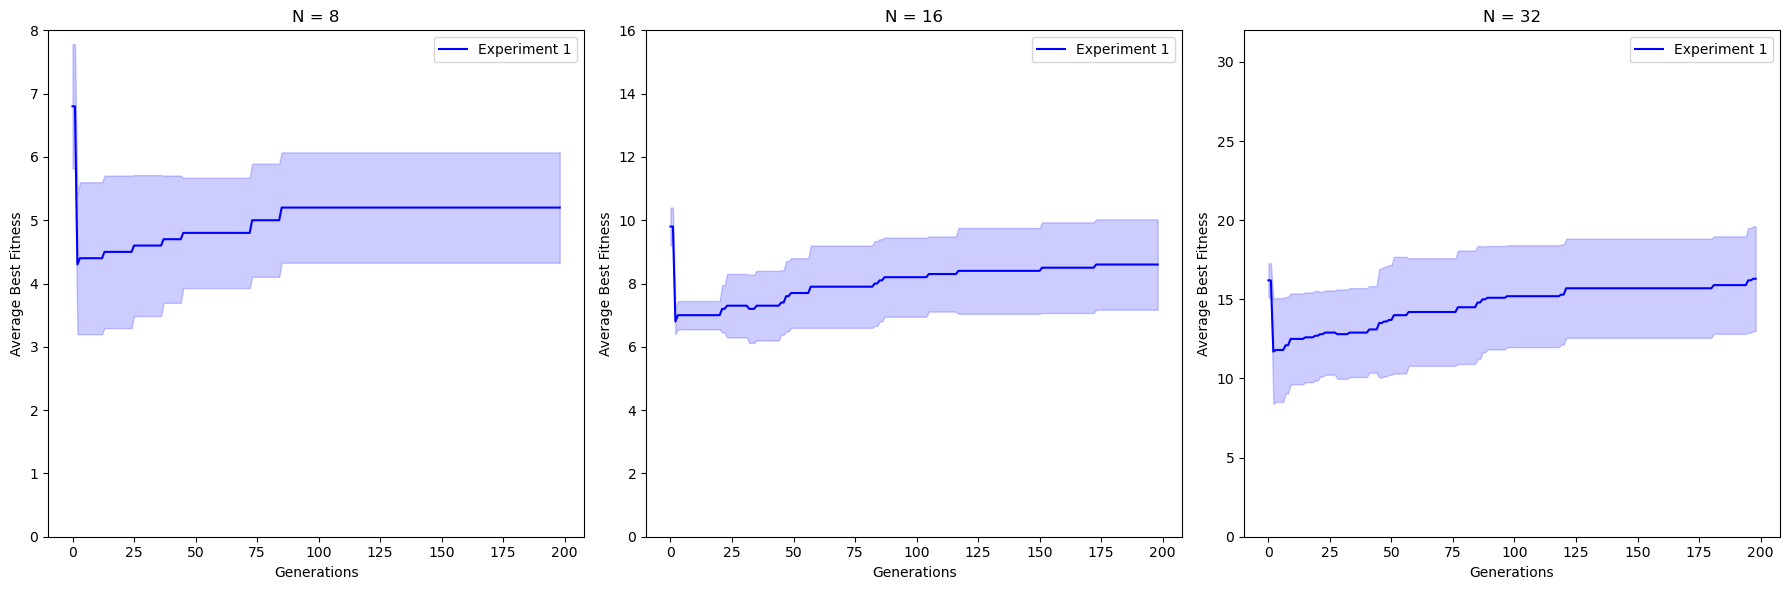

In [19]:
labels = ["N = 8", "N = 16", "N = 32"]

generate_subplot_function(
    avgs_experiment_1,
    stds_experiment_1,
    labels,
    avgs_experiment_2=None,
    stds_experiment_2=None,
    n_columns=3,
    n_queens=[8, 16, 32],
)

### **Question 4 (0-0.4 pt):** 
* Describe the average performance of the algorithm. What was the maximum average fitness found for each case? Do you see any differences between the problem cases?

**Answer**: The choisen algorithm from the slides performs worse than I initially expected. The chosen algorithm for the survivor selection replaces the best individual that performs worse than the child. However, it is clear from the data that the initial state almost always contains a better performing solution whereas (at least for the current number of iterations) a better result is not obtained. It is possible that letting this specific algorithm run for longer, it may reach a better solution state. We do see that the result for N=32 is more rapidly growing to be higher than the initial state with several solutions that do perform better at later generations. The maximum average fitness found are:
- N=8: 8
- N=16: 11
- N=32: 22

In future instances of the algorithm I would opt ton let it run for longer and start by comparing results for a different survivor selection procedure. 

